In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error

In [2]:
data = pd.read_csv(r'G:\FSDA\CUSTOMER LIFE TIEM VALUE\Fn-UseC_-Marketing-Customer-Value-Analysis.csv')

In [3]:
data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [4]:
data.isnull().sum()

Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

In [5]:
data.shape

(9134, 24)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [7]:
categorical_col = data.select_dtypes(include=['object']).columns
Numerical_col = data.select_dtypes(include=['int64','float64']).columns

categorical_col

Index(['Customer', 'State', 'Response', 'Coverage', 'Education',
       'Effective To Date', 'EmploymentStatus', 'Gender', 'Location Code',
       'Marital Status', 'Policy Type', 'Policy', 'Renew Offer Type',
       'Sales Channel', 'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [8]:
Numerical_col

Index(['Customer Lifetime Value', 'Income', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies',
       'Total Claim Amount'],
      dtype='object')

In [9]:
### Exploratory data analysis 

In [10]:
## univarient analysis on customer life time value
data['Customer Lifetime Value'].describe()

count     9134.000000
mean      8004.940475
std       6870.967608
min       1898.007675
25%       3994.251794
50%       5780.182197
75%       8962.167041
max      83325.381190
Name: Customer Lifetime Value, dtype: float64

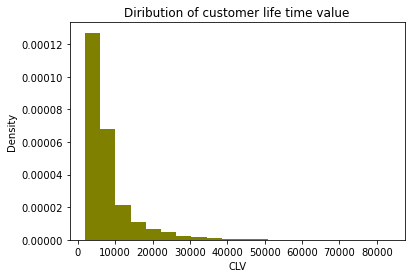

In [11]:
plt.hist(data['Customer Lifetime Value'],bins=20,density=True,color = 'olive')
plt.xlabel('CLV')
plt.ylabel('Density')
plt.title('Diribution of customer life time value')
plt.show()

In [12]:
## univarients analysis on Monthly Premium Auto
data['Monthly Premium Auto'].describe()

count    9134.000000
mean       93.219291
std        34.407967
min        61.000000
25%        68.000000
50%        83.000000
75%       109.000000
max       298.000000
Name: Monthly Premium Auto, dtype: float64

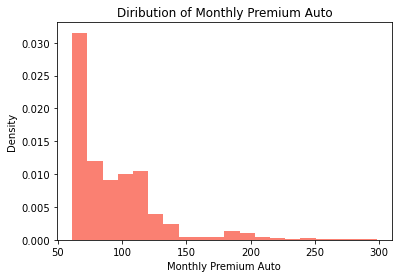

In [13]:
plt.hist(data['Monthly Premium Auto'],bins=20,density=True,color = 'salmon')
plt.xlabel('Monthly Premium Auto')
plt.ylabel('Density')
plt.title('Diribution of Monthly Premium Auto')
plt.show()

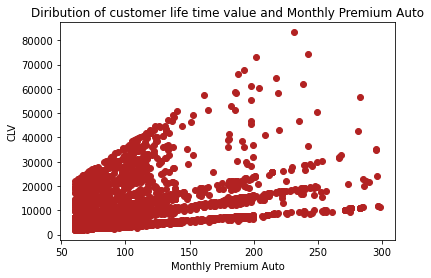

In [14]:
## univarient analysis between Monthly Premium Auto and CLv
plt.scatter(data['Monthly Premium Auto'],data['Customer Lifetime Value'],color='firebrick')
plt.xlabel('Monthly Premium Auto')
plt.ylabel('CLV')
plt.title('Diribution of customer life time value and Monthly Premium Auto')
plt.show()

In [15]:
data['Monthly Premium Auto'].corr(data['Customer Lifetime Value'])

0.3962617375340209

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

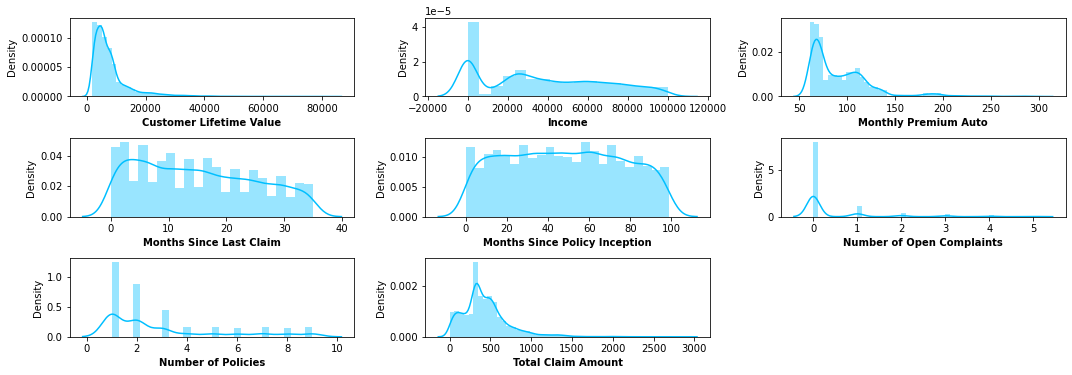

In [16]:
plt.figure(figsize=(15, 100))
for i, col in enumerate(Numerical_col):
    plt.subplot(60, 3, i+1)
    sns.distplot(x=data[col], color='deepskyblue')
    plt.xlabel(col, weight='bold')
    plt.tight_layout()

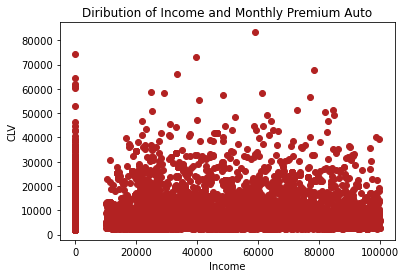

In [17]:
plt.scatter(data['Income'],data['Customer Lifetime Value'],color='firebrick')
plt.xlabel('Income')
plt.ylabel('CLV')
plt.title('Diribution of Income and Monthly Premium Auto')
plt.show()

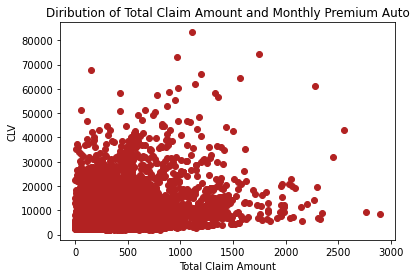

In [18]:
plt.scatter(data['Total Claim Amount'],data['Customer Lifetime Value'],color='firebrick')
plt.xlabel('Total Claim Amount')
plt.ylabel('CLV')
plt.title('Diribution of Total Claim Amount and Monthly Premium Auto')
plt.show()

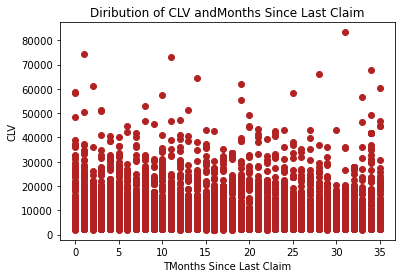

In [19]:
plt.scatter(data['Months Since Last Claim'],data['Customer Lifetime Value'],color='firebrick')
plt.xlabel('TMonths Since Last Claim')
plt.ylabel('CLV')
plt.title('Diribution of CLV andMonths Since Last Claim')
plt.show()

In [20]:
data.corr()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
Customer Lifetime Value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451
Income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254
Monthly Premium Auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
Months Since Last Claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563
Months Since Policy Inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335
Number of Open Complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241
Number of Policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354
Total Claim Amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000


<AxesSubplot:>

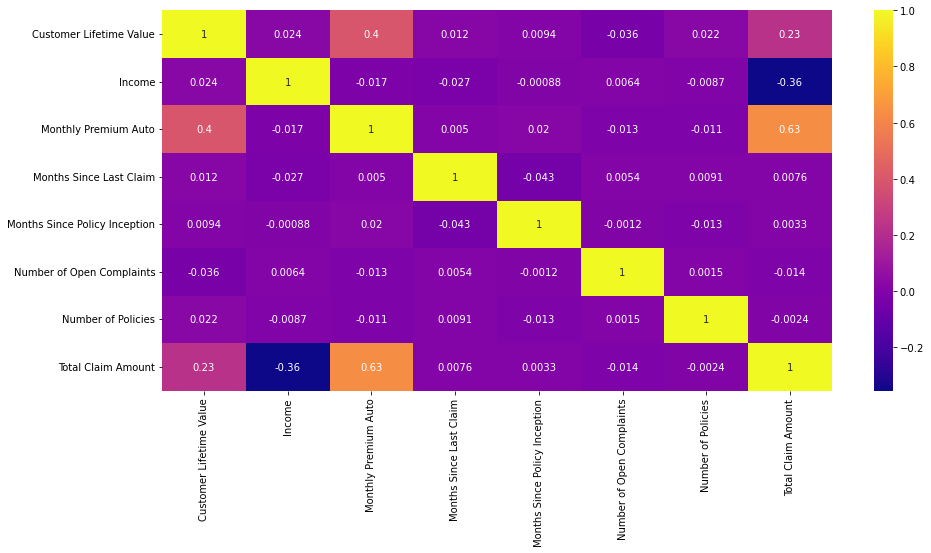

In [21]:
plt.figure(figsize=(15,7))
sns.heatmap(data.corr(),annot=True,cmap='plasma')

In [22]:
data.corr()['Customer Lifetime Value']

Customer Lifetime Value          1.000000
Income                           0.024366
Monthly Premium Auto             0.396262
Months Since Last Claim          0.011517
Months Since Policy Inception    0.009418
Number of Open Complaints       -0.036343
Number of Policies               0.021955
Total Claim Amount               0.226451
Name: Customer Lifetime Value, dtype: float64

In [23]:
## Effect of insurance coverage on customer life time value

In [24]:
def without_hue(ax, feature):
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)

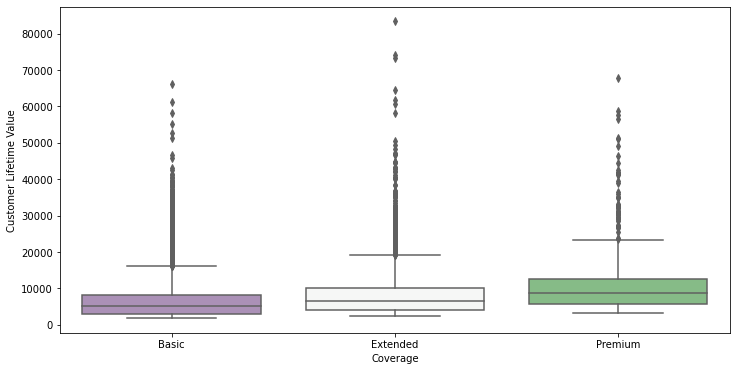

In [25]:

plt.figure(figsize=(12,6))
sns.boxplot(x=data['Coverage'],y=data['Customer Lifetime Value'],data=data,palette='PRGn')
plt.show()

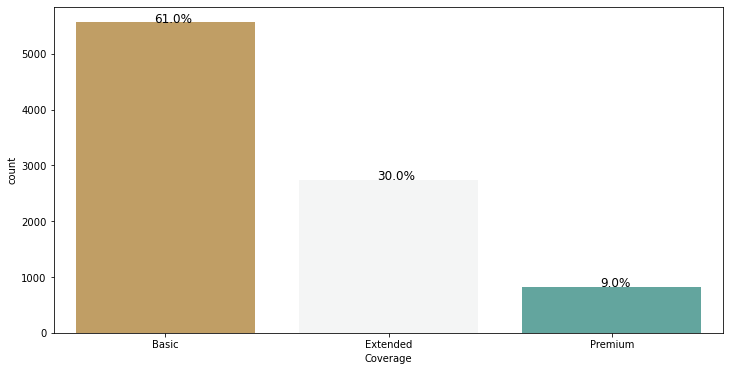

In [26]:

plt.figure(figsize=(12,6))
ax=sns.countplot(x=data['Coverage'],data=data,palette='BrBG')
without_hue(ax,data['Coverage'] )
plt.show()

The customer who takes the basic coverage are more valueable than other 

In [27]:
##Effect of Education on Customer Life Time Value (CLV)

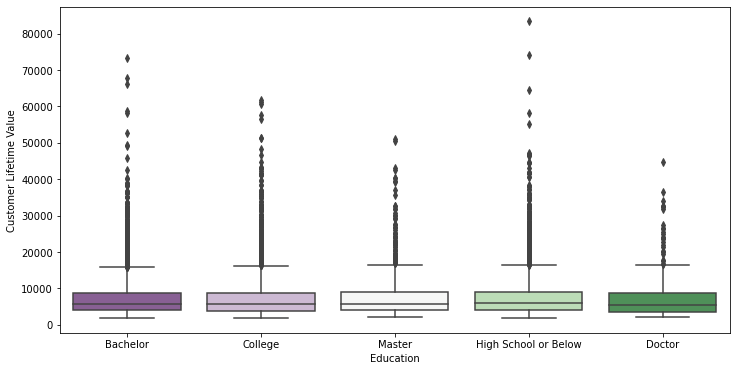

In [28]:
plt.figure(figsize=(12,6))
sns.boxplot(x=data['Education'],y=data['Customer Lifetime Value'],data=data,palette='PRGn')
plt.show()

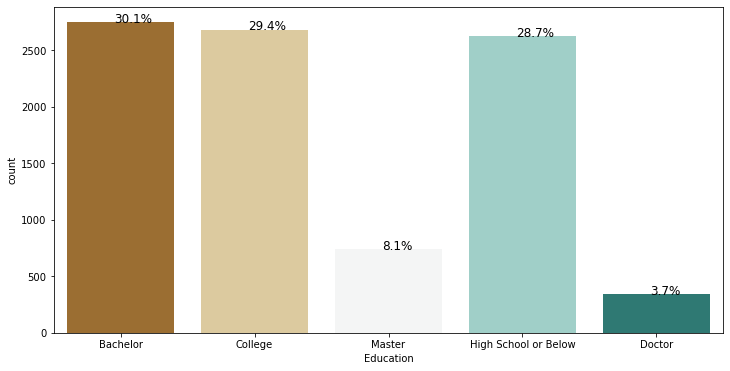

In [29]:
plt.figure(figsize=(12,6))
ax=sns.countplot(x=data['Education'],data=data,palette='BrBG')
without_hue(ax,data['Education'] )
plt.show()

In [30]:
### Educated customers are more valueable but Higher educataed customers such ass doctors and master are not

In [31]:
#Effect of Employment Status on Customer Life Time Value (CLV) EmploymentStatus

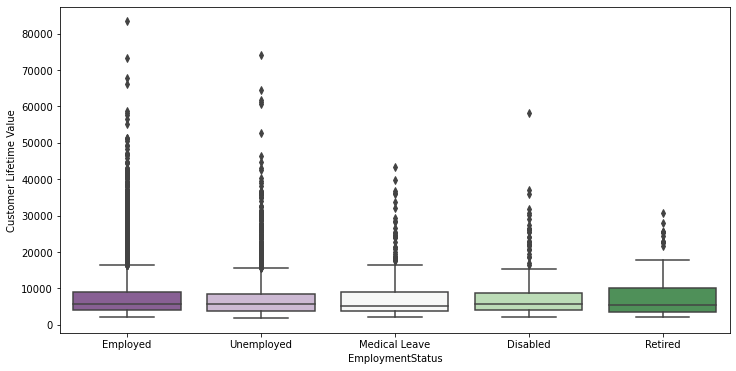

In [32]:
plt.figure(figsize=(12,6))
sns.boxplot(x=data['EmploymentStatus'],y=data['Customer Lifetime Value'],data=data,palette='PRGn')
plt.show()

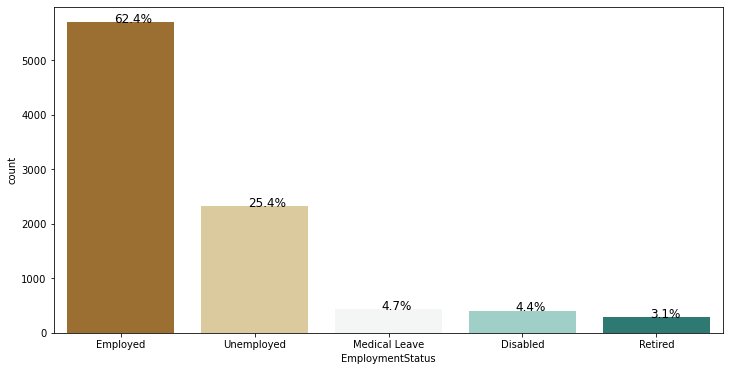

In [33]:
plt.figure(figsize=(12,6))
ax=sns.countplot(x=data['EmploymentStatus'],data=data,palette='BrBG')
without_hue(ax,data['EmploymentStatus'] )
plt.show()

In [34]:
## employed customers are more valuables

In [35]:
##Effect of Gender on Customer Life Time Value (CLV)

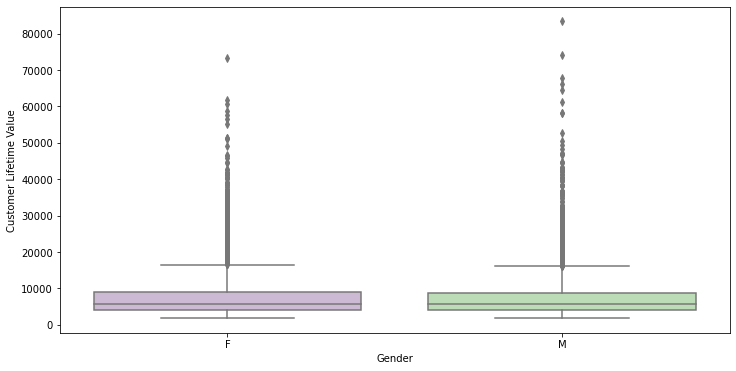

In [36]:
plt.figure(figsize=(12,6))
sns.boxplot(x=data['Gender'],y=data['Customer Lifetime Value'],data=data,palette='PRGn')
plt.show()

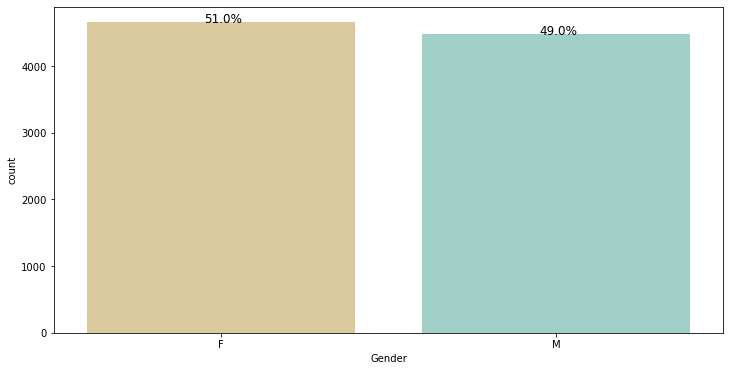

In [37]:
plt.figure(figsize=(12,6))
ax=sns.countplot(x=data['Gender'],data=data,palette='BrBG')
without_hue(ax,data['Gender'] )
plt.show()

In [38]:
### Gender is not play amy imporatnat role to decide the customer s value

In [39]:
 ##Effect of Renew Offer Type on Customer Life Time Value (CLV)
    
    ['Customer', 'State', 'Response', 'Coverage', 'Education',
       'Effective To Date', 'EmploymentStatus', 'Gender', 'Location Code',
       'Marital Status', 'Policy Type', 'Policy', 'Renew Offer Type',
       'Sales Channel', 'Vehicle Class', 'Vehicle Size'],

IndentationError: unexpected indent (1312862031.py, line 3)

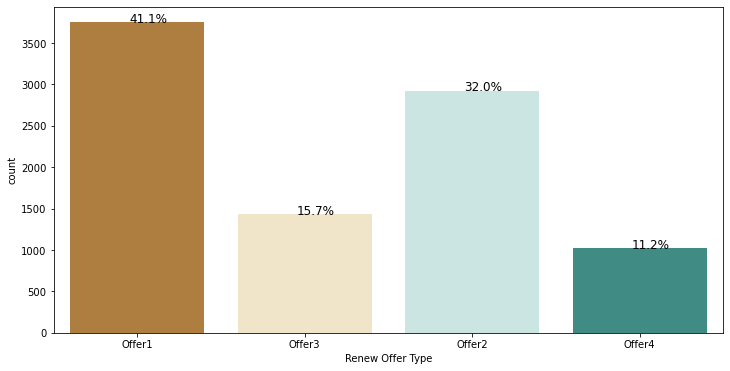

In [40]:
plt.figure(figsize=(12,6))
ax=sns.countplot(x=data['Renew Offer Type'],data=data,palette='BrBG')
without_hue(ax,data['Renew Offer Type'] )
plt.show()

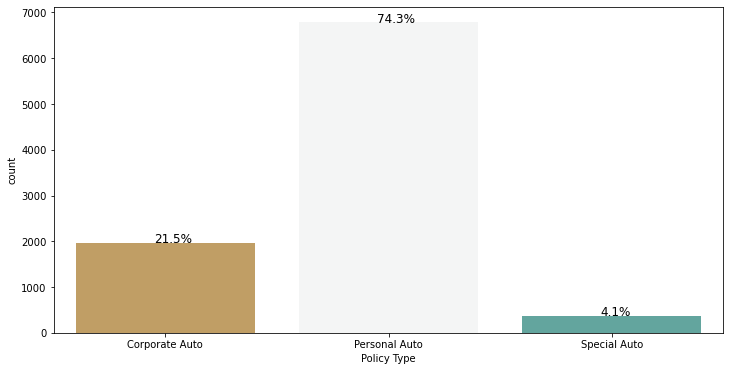

In [41]:
plt.figure(figsize=(12,6))
ax=sns.countplot(x=data['Policy Type'],data=data,palette='BrBG')
without_hue(ax,data['Policy Type'] )
plt.show()

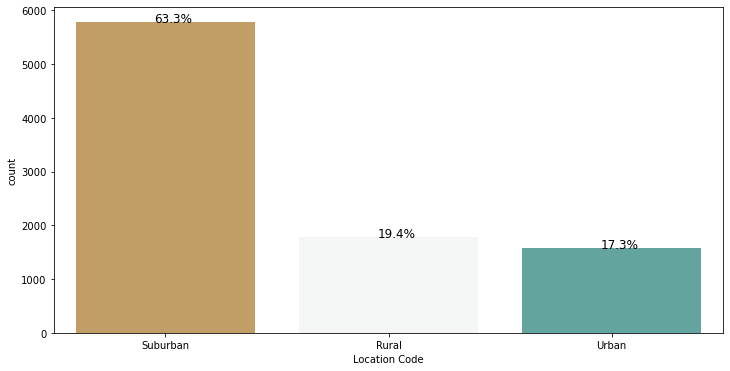

In [42]:
plt.figure(figsize=(12,6))
ax=sns.countplot(x=data['Location Code'],data=data,palette='BrBG')
without_hue(ax,data['Location Code'] )
plt.show()

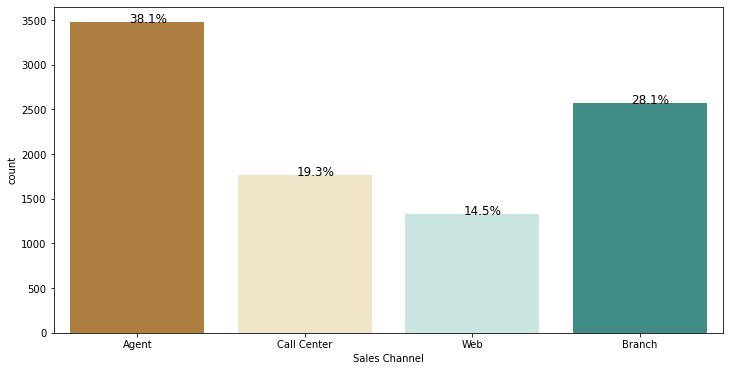

In [43]:
plt.figure(figsize=(12,6))
ax=sns.countplot(x=data['Sales Channel'],data=data,palette='BrBG')
without_hue(ax,data['Sales Channel'] )
plt.show()

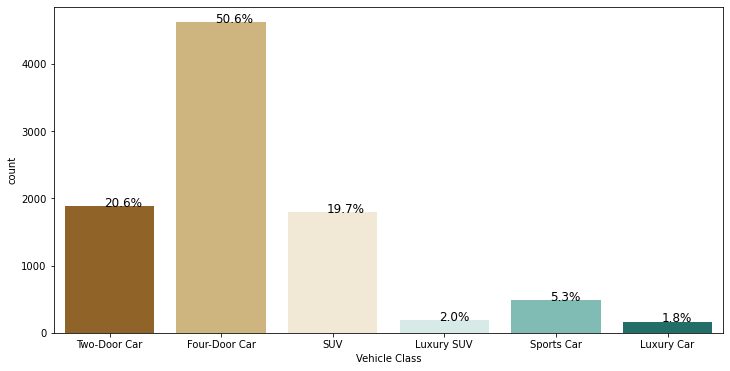

In [44]:
plt.figure(figsize=(12,6))
ax=sns.countplot(x=data['Vehicle Class'],data=data,palette='BrBG')
without_hue(ax,data['Vehicle Class'] )
plt.show()

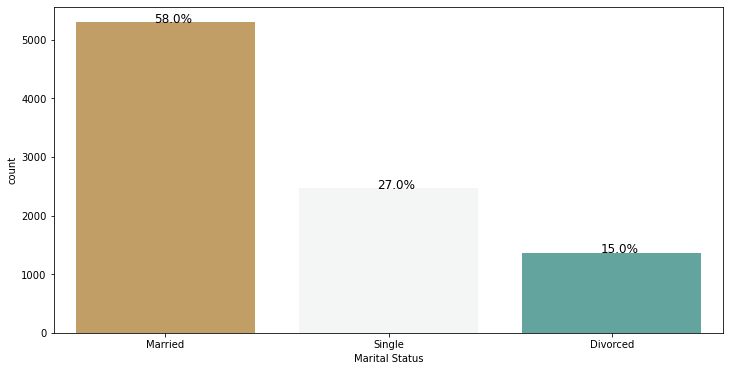

In [45]:
plt.figure(figsize=(12,6))
ax=sns.countplot(x=data['Marital Status'],data=data,palette='BrBG')
without_hue(ax,data['Marital Status'] )
plt.show()

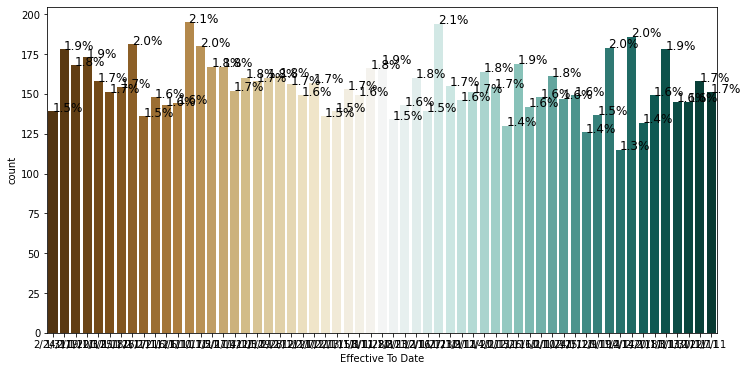

In [46]:
plt.figure(figsize=(12,6))
ax=sns.countplot(x=data['Effective To Date'],data=data,palette='BrBG')
without_hue(ax,data['Effective To Date'] )
plt.show()

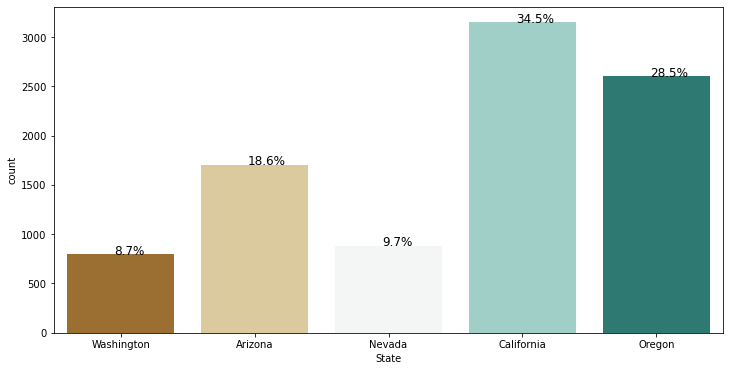

In [47]:
plt.figure(figsize=(12,6))
ax=sns.countplot(x=data['State'],data=data,palette='BrBG')
without_hue(ax,data['State'] )
plt.show()

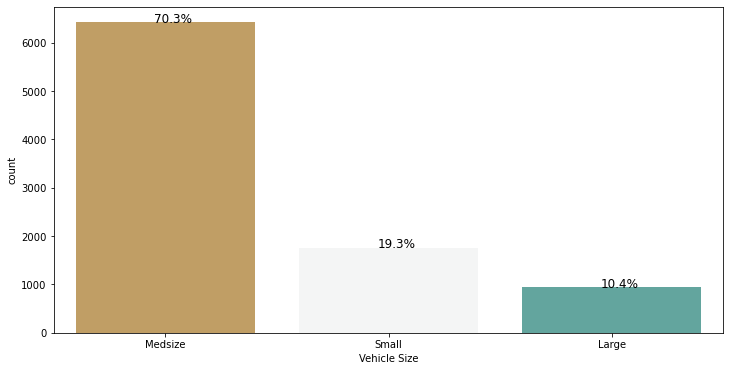

In [48]:
plt.figure(figsize=(12,6))
ax=sns.countplot(x=data['Vehicle Size'],data=data,palette='BrBG')
without_hue(ax,data['Vehicle Size'] )
plt.show()

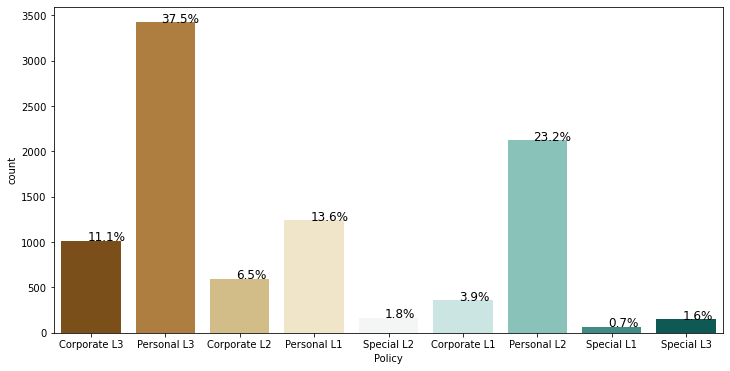

In [49]:
plt.figure(figsize=(12,6))
ax=sns.countplot(x=data['Policy'],data=data,palette='BrBG')
without_hue(ax,data['Policy'] )
plt.show()

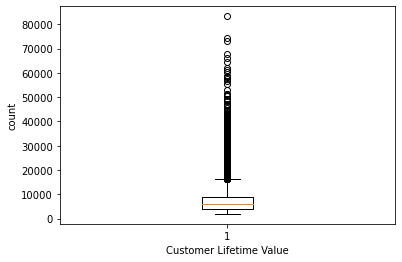

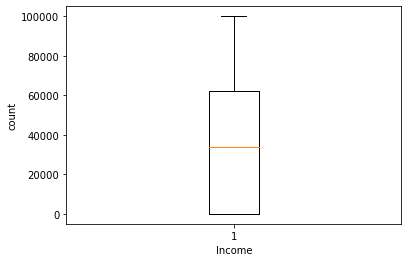

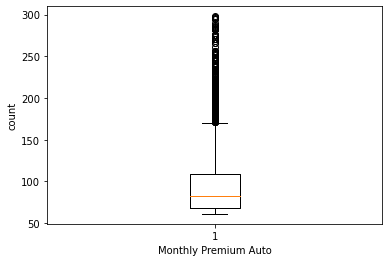

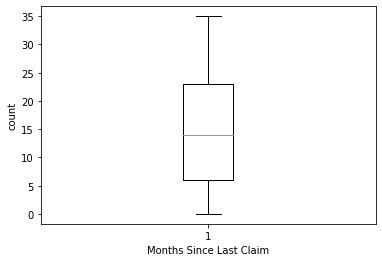

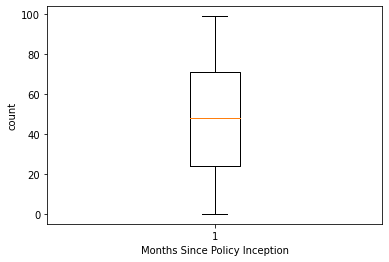

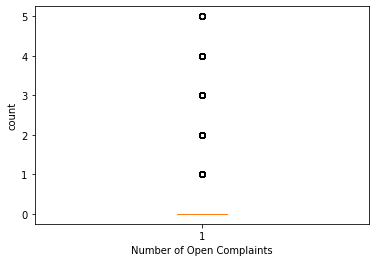

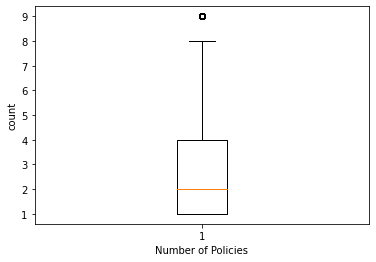

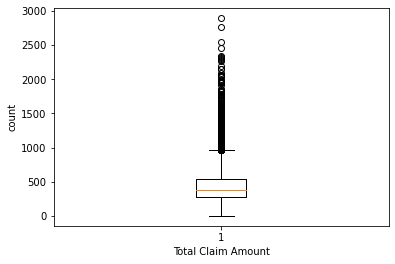

In [88]:
for col_name in Numerical_col:
    if(data[col_name].dtypes=='int64' or data[col_name].dtypes=='float64'):
        plt.boxplot(data[col_name])
        plt.xlabel(col_name)
        plt.ylabel('count')
        plt.show()

In [89]:
Numerical_col

Index(['Customer Lifetime Value', 'Income', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies',
       'Total Claim Amount'],
      dtype='object')

In [92]:
col_names=['Customer Lifetime Value','Total Claim Amount','Monthly Premium Auto']
Q1 = data['Customer Lifetime Value'].quantile(0.25)
Q3 = data['Customer Lifetime Value'].quantile(0.75)
IQR = Q3 - Q1
data = data[(data['Customer Lifetime Value'] >= Q1 - 1.5*IQR) & (data['Customer Lifetime Value'] <= Q3 + 1.5*IQR)]


Q1 = data['Total Claim Amount'].quantile(0.25)
Q3 = data['Total Claim Amount'].quantile(0.75)
IQR = Q3 - Q1
data =data[(data['Total Claim Amount'] >= Q1 - 1.5*IQR) & (data['Total Claim Amount'] <= Q3 + 1.5*IQR)]

Q1 = data['Monthly Premium Auto'].quantile(0.25)
Q3 =data['Monthly Premium Auto'].quantile(0.75)
IQR = Q3 - Q1
data = data[(data['Monthly Premium Auto'] >= Q1 - 1.5*IQR) & (data['Monthly Premium Auto'] <= Q3 + 1.5*IQR)]



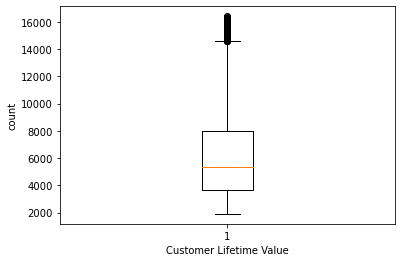

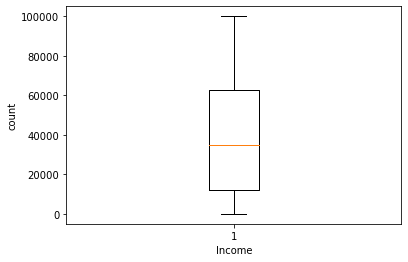

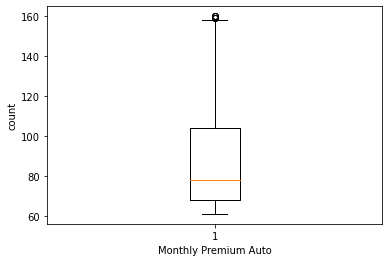

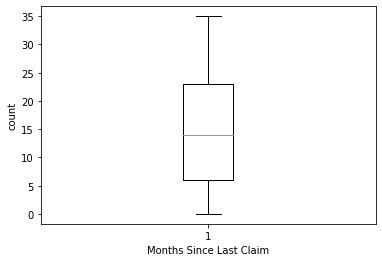

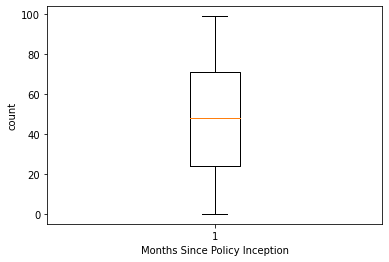

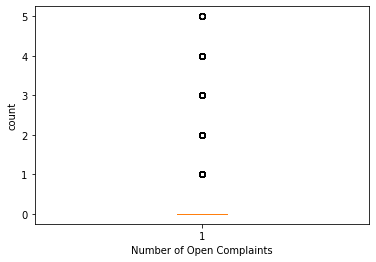

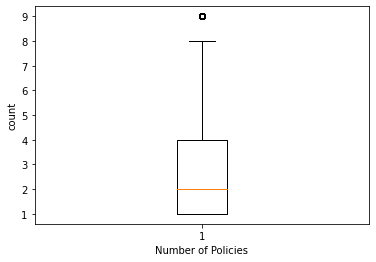

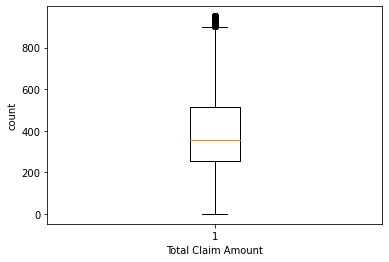

In [93]:
for col_name in Numerical_col:
    if(data[col_name].dtypes=='int64' or data[col_name].dtypes=='float64'):
        plt.boxplot(data[col_name])
        plt.xlabel(col_name)
        plt.ylabel('count')
        plt.show()

5. Regression Analysis with Continuous Variables

In [94]:
df = data[Numerical_col]

In [95]:
df.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,2763.519279,56274,69,32,5,0,1,384.811147
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
5,8256.297800,62902,69,14,94,0,2,159.383042


In [96]:
X = df.drop(['Customer Lifetime Value'],axis=1)
y= df['Customer Lifetime Value']

In [97]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state= 1)

In [98]:
model = LinearRegression()

In [99]:
model.fit(X_train,y_train)

LinearRegression()

In [100]:
X2 = sm.add_constant(X)
est = sm.OLS(y,X2)
est2 = est.fit()
print(est2.summary())

                               OLS Regression Results                              
Dep. Variable:     Customer Lifetime Value   R-squared:                       0.236
Model:                                 OLS   Adj. R-squared:                  0.236
Method:                      Least Squares   F-statistic:                     345.2
Date:                     Wed, 18 Jan 2023   Prob (F-statistic):               0.00
Time:                             00:27:46   Log-Likelihood:                -72927.
No. Observations:                     7817   AIC:                         1.459e+05
Df Residuals:                         7809   BIC:                         1.459e+05
Df Model:                                7                                         
Covariance Type:                 nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------

p-value of model is less than 0.05, so atleast one of the independent variables are significant.
p-value of MonthlyPremiumAuto, NumberofOpenComplaints and NumberofPolicies are less then 0.05, so rejecting the null hypothesis. So atlest one of them independed variables are significant and can effect the CLV.
However R squared is very low, only 16.02% of the variance found in the CLV can be explained by Income, MPA, MonthsSinceLastClaim, MonthsSincePolicyInception, NumberofOpenComplaints, NumberofPolicies, TCA.
Adjusted R squared is 0.1537 which is less than R squared.
Residual standard error is 6322 which is very very high, so it means the actual CLV will deviate from the true regression line by approximately 6322 on an average. The smaller the standard error, the less the spread and the more likely it is that any sample mean is close to the population mean. A small standard error is thus a Good Thing.
Gap between R-squared and Adjusted R-squared is 1.4% only, which is good. Typically the more non-significant variables you add into the model, the gap between two increases.
F-statistic: 6.958 - The lower the F-statistic, the closer to a non-significant model. So F-statistic is low means it is not very significant model.

In [101]:
x_new = df[['Total Claim Amount','Number of Policies','Monthly Premium Auto','Number of Open Complaints']]

In [102]:
X_train,X_test,y_train,y_test = train_test_split(x_new,y,test_size = 0.2,random_state= 1)

In [103]:
model.fit(X_train,y_train)

LinearRegression()

In [104]:
X3 = sm.add_constant(x_new)
est = sm.OLS(y,X3)
est3 = est.fit()
print(est3.summary())

                               OLS Regression Results                              
Dep. Variable:     Customer Lifetime Value   R-squared:                       0.234
Model:                                 OLS   Adj. R-squared:                  0.234
Method:                      Least Squares   F-statistic:                     597.2
Date:                     Wed, 18 Jan 2023   Prob (F-statistic):               0.00
Time:                             00:27:48   Log-Likelihood:                -72938.
No. Observations:                     7817   AIC:                         1.459e+05
Df Residuals:                         7812   BIC:                         1.459e+05
Df Model:                                4                                         
Covariance Type:                 nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------

CLV = 433.9-0.9573TCA+76.59NP+84.21MPA-237.18NPC

### So the customers having more number of policies with high monthly premium will add more value to company.

### On the other hand, customer's Open Complaints and More Claim Amount will decrease the CLV.

In [105]:
y_pred= model.predict(X_test)

In [106]:
print("MSE",mean_squared_error(y_test,y_pred))
print("MAE",mean_absolute_error(y_test,y_pred))

MSE 7504628.322884957
MAE 2032.6663549444486


In [107]:
r2 = r2_score(y_test,y_pred)
print(r2)

0.22876091923157005


In [108]:

error = mean_absolute_percentage_error(y_test, y_pred)
print(error)

0.3862328673778424


In [50]:
data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [57]:
n_data=data[Numnerical_col] 

,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


# IV analysis

IV analysis is done on features to check the predictive power of features(independent attributes) by binning the values and calculating the weight of eveidence and finaly computing IV-Score which gives you the predictive power based on predefined range of IV-Score. below are the range of data

#Information Value 	        Predictive power

#<0.02	                     Useless 

#0.02 to 0.1	             Weak predictors

#0.1 to 0.3	                 Medium Predictors 

#0.3 to 0.5	                 Strong predictors

#>0.5	                     Suspicious

Note:before calculating the weight of evidence make sure to bin the features if they are not categorical.and make sure each bin should have atleast 5% of data distributed in each bin

In [55]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
# col_list = []
# for col in data.columns:
#     if ((data[col].dtype != 'object') & (col != 'Customer Lifetime Value') ):
#         col_list.append(col)
col_list=['Total Claim Amount','Number of Policies','Monthly Premium Auto','Number of Open Complaints']
X = data[col_list]
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))] 
print(vif_data)

                     feature       VIF
0         Total Claim Amount  5.341212
1         Number of Policies  2.139048
2       Monthly Premium Auto  6.747033
3  Number of Open Complaints  1.154872


In [63]:
col_list=['Number of Policies','Monthly Premium Auto','Number of Open Complaints']
X = data[col_list]
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))] 
print(vif_data)

                     feature       VIF
0         Number of Policies  2.136844
1       Monthly Premium Auto  2.229857
2  Number of Open Complaints  1.154381


In [66]:
x_new = data[['Number of Policies','Monthly Premium Auto','Number of Open Complaints']]

In [84]:
 X_train,X_test,y_train,y_test = train_test_split(x_new,y,test_size = 0.2,random_state= 1)

In [85]:
model.fit(X_train,y_train)

LinearRegression()

In [86]:
y_pred= model.predict(X_test)

In [87]:

error = mean_absolute_percentage_error(y_test, y_pred)
print(error)

0.6069477339948856


1. There are a lot of Customers with low CLV. Very few customers with high CLV.
2. Customers who have taken Basic Insurance for their vehicle are more valuable then Extended or Premium Insurance Policy holders.
3. Educated Employed customers (with a bachelors or equivalent degree) are more valuable than Retired, Unemployed or Disabled Customers.
4. Gender has no role to play in determining the value of a customer. Both Male and Female looks valuable.
5. Marital customers are buying more auto insurance and adding more value to company.
6. Rural customers are LESS valuable than Urban customers.
7. Customers having their own Personal Policy are more valuable to company then Corporate and Special Insurance policy holder.
8. Offers 1 and Offer 2 attracts more customers.
9. Call Center is not performing well compared to other channels throughout the country (in terms of high value customers)
10. Customers having Mid Size vehicles, Four-Door car or SUV are more valuable.
11. California customers are adding more value to the company.
12. Personal L3 Policy is adding more value to company.xiii.
13. The customers having more number of policies with high monthly premium will add more value to company. On the other hand, customer's Open Complaints and More Claim Amount will decrease the CLV.

This report represents my analysis for the auto Insurance company. It is my opinion that based on the data provided, targeting appropriate customers could increase the Customer Lifetime Value. The two proposed changes are as follows:

A) Insurance company should target educated married employed customers from Urban areas having Mid Size vehicles to increase the Customer Lifetime Value (CLV) increase.

B) On the other hand, if customer's Open Complaints would not be resolved soon and claim amount would not bring down, then both could decrease the Customer Lifetime Value (CLV).

C) About 38% value was added by the agents to the company whereas call centers added only 20% value. So agents should be preferred over call centers while selling the auto insurance to customers.

D) Factors which are responsible for increasing the CLV are Monthly Premium and Number of Policies, however Open Complaints and Claim Amount can decrease the CLV.